# LAB 02 - DIGITAL IMAGE AND VIDEO PROCESSING

### Libraries included in this assignment

In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from scipy import ndimage
import cv2

### Read Image

In [2]:
def read_image():
    # Input the image file name
    filename = input("Enter name of the file: ")
    
    # Read the image file
    img = Image.open(filename).convert('L')
    img = np.asarray(img)

    return img

img = read_image()


### Convolution Function
The convolution function is used for applying filters with kernel, which will be later be used for noise reduction as well as applying other type of edge detection

In [3]:
# Convolution function for applying filter
# The function take image and filter kernel as input and sum the elements of the matrix multiplication for calculating the pixel of the image
def convolution(img, kernel):
    new_img = np.zeros(img.shape, img.dtype)

    # Middle of the kernel
    offset = len(kernel) // 2

    # Image dimensions
    H, W = img.shape

    # Pad the image with wrap mode
    P = offset
    img = np.pad (img, ((P, P), (P, P)), mode='wrap')
    
    # Apply filter to each pixel separately and add them together
    for y in range (offset, H + offset):
        for x in range (offset, W + offset):
            for i in range (len(kernel)):
                for j in range (len(kernel)):
                    # Use the padded image coordinates
                    new_img[y - offset][x - offset] += img[y + i - offset][x + j - offset] * kernel[i][j]

    return new_img

### Sobel Edge Detection Operator
The Sobel edge detection use the convolution to find the X and Y gradient of the image. The kernel for X and Y gradient of the image is defined as below:
$$
Gx\_kernel = 
\begin{bmatrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1
\end{bmatrix}
$$

$$
Gy\_kernel = 
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$

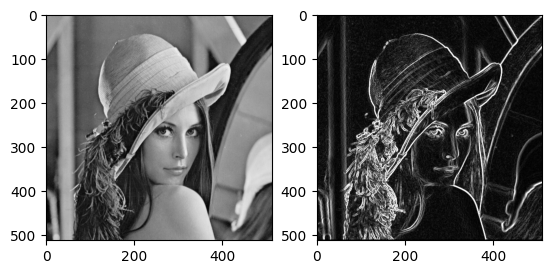

In [4]:
# Definition of the Sobel filters
def sobel_filter(img):
    # Definition of the Sobel filters' kernel
    Gx_kernel = [[-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]]

    Gy_kernel = [[-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]]
    
    new_img = np.zeros(img.shape, img.dtype)

    # Middle of the kernel
    offset = len(Gx_kernel) // 2

    # Apply filter to each pixel separately and add them together
    for y in range (offset, img.shape[0] - offset):
        for x in range (offset, img.shape[1] - offset):
            gx, gy = 0, 0
            for i in range (len(Gx_kernel)):
                for j in range (len(Gx_kernel)):
                    gx += (img[y + i - offset][x + j - offset] * Gx_kernel[i][j])
                    gy += (img[y + i - offset][x + j - offset] * Gy_kernel[i][j])

                    new_img[y][x] = min(int((gx**2 + gy**2)**0.5), 255)

    return new_img

sobel_img = sobel_filter(img)

# Show the result image
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(sobel_img, cmap='gray')

Comparing with openCV Sobel operator function

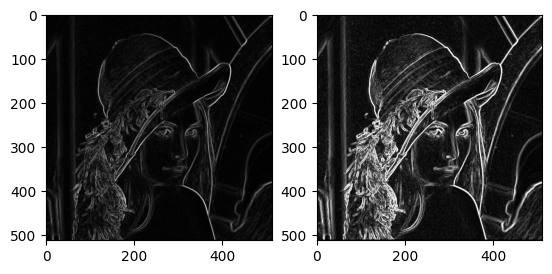

In [5]:
# Apply Sobel edge detection
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude of the gradient
magnitude = np.sqrt(sobelx**2 + sobely**2)

fig, ax = plt.subplots(1,2)
# openCV result
ax[0].imshow(magnitude, cmap='gray')
# My result
ax[1].imshow(sobel_img, cmap='gray')

### Prewitt Edge Detection Operator
The same with Sobel operator, Prewitt operator use the convolution to find the gradients of the image. The difference is Prewitt operator use the following kernels
$$
Gx\_kernel = 
\begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1
\end{bmatrix}
$$

$$
Gy\_kernel = 
\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix}
$$

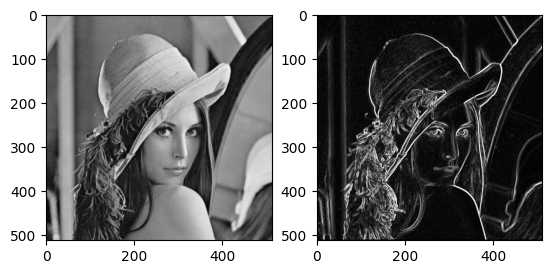

In [6]:
# Definition of the Sobel filters
def prewitt_filter(img):
    # Definition of the Sobel filters' kernel
    Gx_kernel = [[-1, 0, 1],
                 [-1, 0, 1],
                 [-1, 0, 1]]


    Gy_kernel = [[-1, -1, -1],
                 [ 0,  0,  0],
                 [ 1,  1,  1]]
    
    new_img = np.zeros(img.shape, img.dtype)

    # Middle of the kernel
    offset = len(Gx_kernel) // 2

    # Apply filter to each pixel separately and add them together
    for y in range (offset, img.shape[0] - offset):
        for x in range (offset, img.shape[1] - offset):
            gx, gy = 0, 0
            for i in range (len(Gx_kernel)):
                for j in range (len(Gx_kernel)):
                    gx += (img[y + i - offset][x + j - offset] * Gx_kernel[i][j])
                    gy += (img[y + i - offset][x + j - offset] * Gy_kernel[i][j])

                    new_img[y][x] = min(int((gx**2 + gy**2)**0.5), 255)

    return new_img

prewitt_img = prewitt_filter(img)

# Show the result image
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(prewitt_img, cmap='gray')

### Laplace Edge Detection
Laplace edge detection convolve the Laplace kernel and the image to create the result. The Laplace kernel can either be
$$
\begin{bmatrix}
1 & 1 & 11 \\
1 & -4 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$
for using 4 local or
$$
Gy\_kernel = 
\begin{bmatrix}
1 & 1 & 1 \\
1 & -8 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$
for using 8 local.

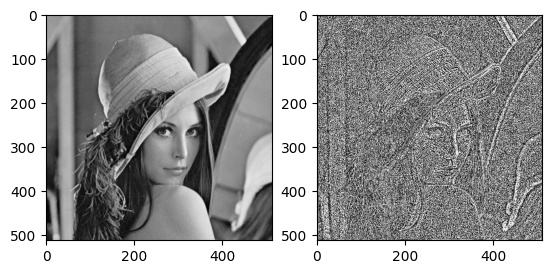

In [7]:
laplace_kernel = np.asarray([[1, 1, 1],
                            [1,-8, 1],
                            [1, 1, 1]])

laplace_img = convolution(img, laplace_kernel)

# Show the result image
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(laplace_img, cmap='gray')

Comparing with openCV Laplace filter

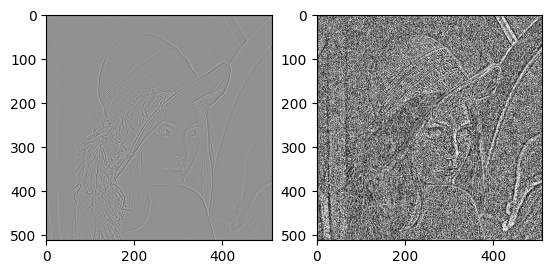

In [8]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)

fig, ax = plt.subplots(1,2)
# openCV result
ax[0].imshow(laplacian, cmap='gray')
# My result
ax[1].imshow(laplace_img, cmap='gray')

### Laplace of Gaussian Edge Detection
Laplace of Gaussian edge detection create the Gaussian kernel base on the size and the sigma that the user input. The kernel of the Laplace of Gaussian (log kernel) is the convolution of the Gaussian kernel and the Laplace kernel. The program will then create the convolution of log kernel and the image as the result of the Laplace of Gaussian edge detection.

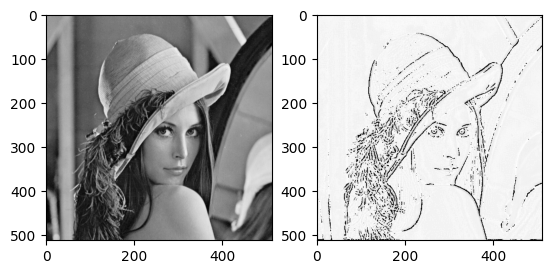

In [9]:
def gaussian_coefficient(x, y, sigma):
    return (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

def gaussian_kernel(size, sigma):
    offset = int(size / 2)
    kernel = np.array([[gaussian_coefficient(x - offset, y - offset, sigma) for x in range(size)] for y in range(size)])

    return kernel

def laplacian_of_gaussian(img, size, sigma):
    # Generate the LoG kernel
    log_kernel = convolution(gaussian_kernel(size, sigma), np.asarray([[1, 1, 1], [1,-8, 1], [1, 1, 1]]))

    # Apply convolution to the image
    result = convolution(img, log_kernel)

    return result

size = 5
sigma = 1.4

# Create and apply the Gaussian filter
LoG_img = laplacian_of_gaussian(img, size, sigma)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(LoG_img, cmap='gray')

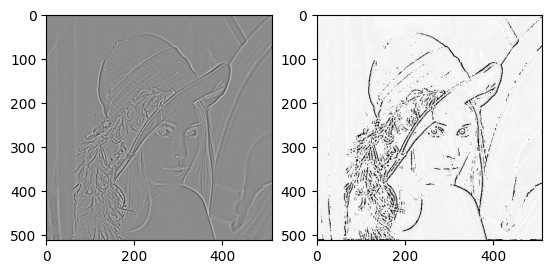

In [17]:
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Laplacian to the blurred image
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

fig, ax = plt.subplots(1,2)
# openCV result
ax[0].imshow(laplacian, cmap='gray')
# My result
ax[1].imshow(LoG_img, cmap='gray')

### Canny Edge Detection

- Step 1: Use the gaussian kernel to reduce the noise of the image

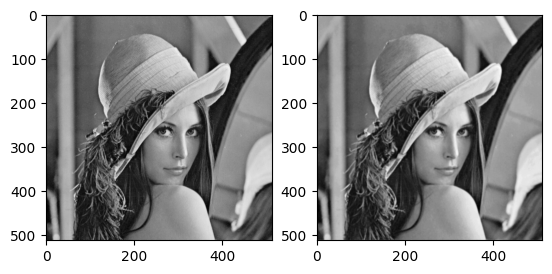

In [11]:
# Approximation of gaussian blur kernel
# The size of the gaussian kernel is 3x3
gaussian_kernel = [[1/16, 1/8, 1/16],
                    [1/8, 1/4, 1/8],
                    [1/16, 1/8, 1/16]]

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
canny_img = convolution(img, gaussian_kernel)
ax[1].imshow(canny_img, cmap='gray')

- Step 2: Finding intensity gradient of the image using the Sobel filter


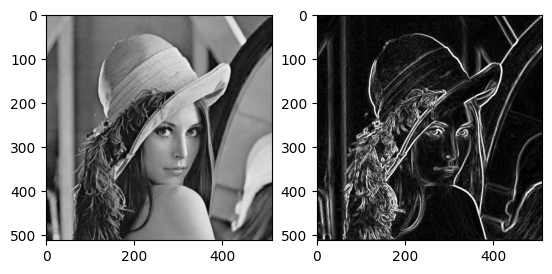

In [12]:
# theta' between X and Y gradients
Gx_kernel = [[-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]]

Gy_kernel = [[-1, -2, -1],
             [ 0,  0,  0],
             [ 1,  2,  1]]
Gx = convolution(canny_img, Gx_kernel)
Gy = convolution(canny_img, Gy_kernel)
theta = np.arctan2(Gx, Gy) * (180 / np.pi)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
canny_img = sobel_filter(canny_img)
ax[1].imshow(canny_img, cmap='gray')

- Step 3: Non-maximum suppression

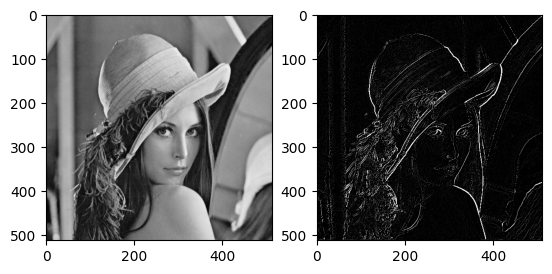

In [13]:
def non_maximum(img, theta):
    suppressed = np.zeros(img.shape, dtype=np.uint8)

    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            angle = theta[i, j]

            # Quantize gradient direction to 0, 45, 90, 135 degrees
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                neighbors = [img[i, j - 1], img[i, j + 1]]
            elif 22.5 <= angle < 67.5:
                neighbors = [img[i - 1, j - 1], img[i + 1, j + 1]]
            elif 67.5 <= angle < 112.5:
                neighbors = [img[i - 1, j], img[i + 1, j]]
            else:
                neighbors = [img[i - 1, j + 1], img[i + 1, j - 1]]

            # Suppress non-maximum values
            if img[i, j] >= max(neighbors):
                suppressed[i, j] = img[i, j]

    return suppressed

canny_img = non_maximum(canny_img, theta)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(canny_img, cmap='gray')

- Step 3: Edge tracking by hysteresis threshold the image

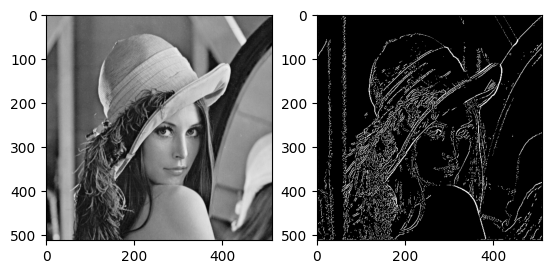

In [14]:
def hysteresis_threshold(edges, low_threshold, high_threshold):
    strong_edges = (edges >= high_threshold)
    weak_edges = (edges >= low_threshold) & (edges < high_threshold)

    # Use connectivity to link weak edges to strong edges
    labels, num_labels = ndimage.label(weak_edges, structure=np.ones((3, 3)))

    for i in range(1, num_labels + 1):
        label_mask = (labels == i)
        if np.any(strong_edges[label_mask]):
            strong_edges |= label_mask

    return strong_edges

canny_img = hysteresis_threshold(canny_img, low_threshold = 20, high_threshold = 50)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(canny_img, cmap='gray')

Comparing with openCV Canny edge detection

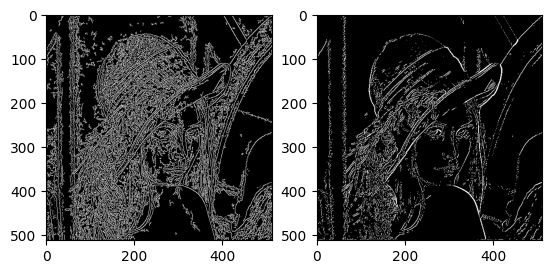

In [16]:
edges = cv2.Canny(img, 20, 50)

fig, ax = plt.subplots(1,2)
# openCV result
ax[0].imshow(edges, cmap='gray')
# My result
ax[1].imshow(canny_img, cmap='gray')

### References
- https://en.wikipedia.org/wiki/Sobel_operator
- https://en.wikipedia.org/wiki/Prewitt_operator
- https://wisdomml.in/how-to-implement-laplacian-operator-edge-detection-in-python/
- https://medium.com/@rohit-krishna/coding-canny-edge-detection-algorithm-from-scratch-in-python-232e1fdceac7
- https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123